In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


597

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nefteyugansk
Processing Record 2 of Set 1 | camana
Processing Record 3 of Set 1 | kloulklubed
Processing Record 4 of Set 1 | luanda
Processing Record 5 of Set 1 | uwayl
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | nouadhibou
Processing Record 8 of Set 1 | omboue
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | xai-xai
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | launceston
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | kedrovoye
Processing Record 16 of Set 1 | buala
Processing Record 17 of Set 1 | alugan
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | 

Processing Record 36 of Set 4 | tasiilaq
Processing Record 37 of Set 4 | port moresby
Processing Record 38 of Set 4 | tura
Processing Record 39 of Set 4 | hasaki
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | katsuura
Processing Record 42 of Set 4 | margate
Processing Record 43 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 4 | arrecife
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | ilebo
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | vysokogornyy
Processing Record 49 of Set 4 | ixtapa
Processing Record 50 of Set 4 | torbay
Processing Record 1 of Set 5 | san rafael
Processing Record 2 of Set 5 | bom jesus
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | salinas
Processing Record 5 of Set 5 | nadym
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | bardstown
Processing Record 8 of Set 5 | richards bay
Processing Record 9 of 

Processing Record 25 of Set 8 | kutum
Processing Record 26 of Set 8 | anadyr
Processing Record 27 of Set 8 | hoquiam
Processing Record 28 of Set 8 | mount isa
Processing Record 29 of Set 8 | mao
Processing Record 30 of Set 8 | maragheh
Processing Record 31 of Set 8 | tete
Processing Record 32 of Set 8 | nicoya
Processing Record 33 of Set 8 | mergui
City not found. Skipping...
Processing Record 34 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 35 of Set 8 | plettenberg bay
Processing Record 36 of Set 8 | ponta delgada
Processing Record 37 of Set 8 | inhambane
Processing Record 38 of Set 8 | adrar
Processing Record 39 of Set 8 | asosa
Processing Record 40 of Set 8 | el alto
Processing Record 41 of Set 8 | pangnirtung
Processing Record 42 of Set 8 | lerwick
Processing Record 43 of Set 8 | biak
Processing Record 44 of Set 8 | talcahuano
Processing Record 45 of Set 8 | cayenne
Processing Record 46 of Set 8 | rabaul
Processing Record 47 of Set 8 | okha
Processing Re

Processing Record 18 of Set 12 | baghdad
Processing Record 19 of Set 12 | vanimo
Processing Record 20 of Set 12 | menongue
Processing Record 21 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 22 of Set 12 | cockburn town
Processing Record 23 of Set 12 | lasa
Processing Record 24 of Set 12 | merauke
Processing Record 25 of Set 12 | vila velha
Processing Record 26 of Set 12 | tynda
Processing Record 27 of Set 12 | mahanoro
Processing Record 28 of Set 12 | phan thiet
Processing Record 29 of Set 12 | arak
Processing Record 30 of Set 12 | bilma
Processing Record 31 of Set 12 | viedma
Processing Record 32 of Set 12 | halifax
Processing Record 33 of Set 12 | chicama
Processing Record 34 of Set 12 | bhatkal
Processing Record 35 of Set 12 | outjo
Processing Record 36 of Set 12 | tabou
Processing Record 37 of Set 12 | montes altos
Processing Record 38 of Set 12 | orange
Processing Record 39 of Set 12 | lincoln
Processing Record 40 of Set 12 | liminangcong
City not found. Sk

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nefteyugansk,61.0998,72.6035,7.05,86,100,15.55,RU,2022-01-27 11:52:07
1,Camana,-16.6228,-72.7111,70.47,83,99,8.21,PE,2022-01-27 11:52:07
2,Kloulklubed,7.0419,134.2556,83.01,78,99,16.13,PW,2022-01-27 11:52:08
3,Luanda,-8.8368,13.2343,84.20,70,40,11.50,AO,2022-01-27 11:50:46
4,Busselton,-33.6500,115.3333,72.09,58,0,19.04,AU,2022-01-27 11:52:08
5,Nouadhibou,20.9310,-17.0347,62.58,77,66,19.57,MR,2022-01-27 11:52:08
6,Omboue,-1.5746,9.2618,84.74,66,98,8.99,GA,2022-01-27 11:52:09
7,Xai-Xai,-25.0519,33.6442,86.40,64,45,14.94,MZ,2022-01-27 11:52:09
8,Saskylakh,71.9167,114.0833,-8.03,85,34,7.31,RU,2022-01-27 11:52:09
9,Launceston,-41.4500,147.1667,69.62,83,69,1.99,AU,2022-01-27 11:51:56


In [8]:
# new_column_order = ["City", "Country", "Data", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[ ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nefteyugansk,RU,2022-01-27 11:52:07,61.0998,72.6035,7.05,86,100,15.55
1,Camana,PE,2022-01-27 11:52:07,-16.6228,-72.7111,70.47,83,99,8.21
2,Kloulklubed,PW,2022-01-27 11:52:08,7.0419,134.2556,83.01,78,99,16.13
3,Luanda,AO,2022-01-27 11:50:46,-8.8368,13.2343,84.20,70,40,11.50
4,Busselton,AU,2022-01-27 11:52:08,-33.6500,115.3333,72.09,58,0,19.04
5,Nouadhibou,MR,2022-01-27 11:52:08,20.9310,-17.0347,62.58,77,66,19.57
6,Omboue,GA,2022-01-27 11:52:09,-1.5746,9.2618,84.74,66,98,8.99
7,Xai-Xai,MZ,2022-01-27 11:52:09,-25.0519,33.6442,86.40,64,45,14.94
8,Saskylakh,RU,2022-01-27 11:52:09,71.9167,114.0833,-8.03,85,34,7.31
9,Launceston,AU,2022-01-27 11:51:56,-41.4500,147.1667,69.62,83,69,1.99


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


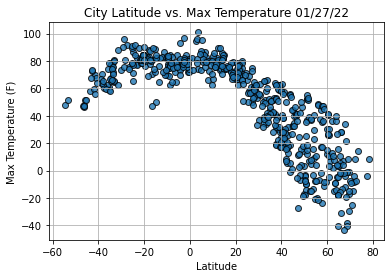

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


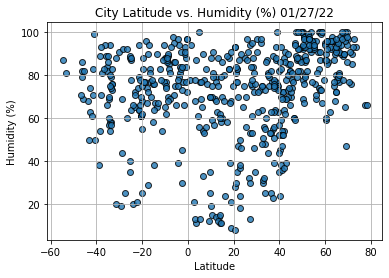

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


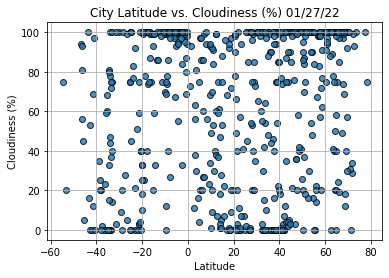

In [20]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()


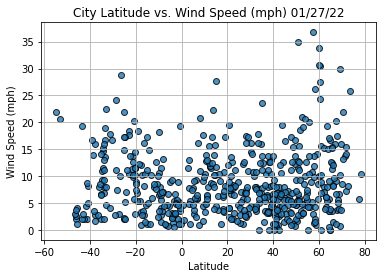

In [23]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()
